# Student and Problem Set Info
---


## Title: MGSC 310: Problem Set 5

Author:

Ryan Jewik

# Comparative Analysis of Ensemble Methods: Random Forest, XGBoost

This notebook will guide you through a comparative analysis of different ensemble machine learning models using the 'Hitters' dataset from the ISLP library. We will focus on Random Forest, XGBoost to predict Major League Baseball player salaries.

# Setup

Pre-req:
- Install the `ISLP package`
- restart your runtime
- load the `Hitters` dataset found [here](https://islp.readthedocs.io/en/latest/datasets/Hitters.html) (data dictionary included in documentation).
- assign the `Hitters` data to the variable `hitters`

In [ ]:
pip install ISLP


In [87]:
from ISLP import load_data
hitters = load_data('Hitters')
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


# Question 1

1. Take the `League` column and assign 'A' to 1 and 'N' to 0. Call the new column `is_amer`.
2. Take the `Division` comlumn and assign 'W' to 1 and 'N' to 0. Call the new column `is_west`.
3. Take the `NewLeague` comlumn and assign 'A' to 1 and 'N' to 0. Call the new column `is_new`.
4. Find and replace `NaN` values in `Salary` with the mean of that player's respective league. If you do not know how to do this, research online. Hint: First find the mean value for the column. Then use .fillna()
5. Assign `is_west`, `is_amer`, `is_new` to the data type int. Hint: see .astype()
6. Assign the feature columns to the variable X. Features should be every column except `League`, `Division`, `NewLeague`,  `Salary`
7. Assign the target_variable y to `Salary`.
8. Explain to me the difference between where `is_amer` comes from (what it represents) versus `is_new`.
9. Train test split the X, y data with a test size of .18 and random_state of 589 and shuffle is True.

In [88]:
mapping = {'A': 1, 'N':0}
hitters['is_amer'] = hitters['League'].map(mapping)
mapping = {'W': 1, 'E':0}
hitters['is_west'] = hitters['Division'].map(mapping)
mapping = {'A': 1, 'N':0}
hitters['is_new'] = hitters['NewLeague'].map(mapping)

In [89]:
eastAvgSalary = hitters.groupby('Division').mean()['Salary'].iloc[0]
westAvgSalary = hitters.groupby('Division').mean()['Salary'].iloc[1]
hitters.loc[hitters['Division']=='E']=hitters.loc[hitters['Division']=='E'].fillna(eastAvgSalary)
hitters.loc[hitters['Division']=='W']=hitters.loc[hitters['Division']=='W'].fillna(westAvgSalary)


In [90]:
hitters = hitters.astype({'is_west': 'int64'})
hitters = hitters.astype({'is_amer': 'int64'})
hitters = hitters.astype({'is_new': 'int64'})

In [91]:
X = hitters[{'AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','PutOuts','Assists','Errors','is_amer','is_west','is_new'}]
y = hitters['Salary']

is_amer indicates which league the player was in before 1987 and is_new indicates what league the player was in during and after 1987.

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .18, random_state = 589, shuffle = True)

## Question 2:

1. Train a random forest regressor on X_train.
2. Set the number of estimators to 50, the random state to 84, and the `max_depth` to 6
3. Look into the documentation for the Random Forest Regressor [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Choose 2 hyperparameters that are not at the default setting for the model and add them into the regressor.
4. What hyperparameters did you choose and why do you think they were applicable? Defend your choice by describing what the hyperparameter and how it relates to the data.
5. Fit your model.
6. Predict your data to the variable `rf_predictions`
7. Import the mean squared error function from sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). What is the error of your model? What does it mean?
8. In a new cell, run the model again, but this time choose different values for the hyperparameters you chose. Fit, predict, and get the mean squared error of the model. Continue doing this until you get a different error from your original model. Write about why you think your choice affected the model predictions.

In [48]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth  =6, random_state = 84, n_estimators = 50,criterion="absolute_error",min_samples_split=5)
regr.fit(X_train,y_train)
rf_predictions = regr.predict(X_test)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, rf_predictions)

I changed the criterion to 'absolute_error' from 'squarred error' because I think the prediction that is 10 off is twice as bad as a prediction that is off by a factor of 5. It is not exponentially worse, additionally the time penality is not really an issue due to the small dataset.

I also changed the min_samples_split to 5 as I didn't want a bunch of splits to occur for only a couple values.

49816.656898904024

In [18]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth  =6, random_state = 84, n_estimators = 50,criterion="friedman_mse",min_samples_split=10)
regr.fit(X_train,y_train)
rf_predictions = regr.predict(X_test)
mean_squared_error(y_test, rf_predictions)

52640.00508494527

# Question 3:

1. Go back to class 17 [here](https://colab.research.google.com/drive/1ZWr8d90JB7OjxVLX5jfhJ3TFSIfHluPM?usp=sharing). Choose any of the interpretable AI visuals we generated and implement them on your best fitting model from above. Ensure your visual is returned in the notebook. Feel free to copy and paste the code you need.
2. Explain what you think the visual means as it relates to predictions or features of the dataset.

In [ ]:
! pip install shap

In [ ]:
import shap
# Calculate SHAP values
explainer = shap.TreeExplainer(regr)
shap_values = explainer.shap_values(X_test)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, plot_type="bar")

A SHAP value represents the contribution to a prediction that the variable makes. Therefore we can interpret that a variable like CRBI heavily contributes to the predicted salary while is_amer does not.

## Question 4

Now you will perform similar predictions using XGBoost

1. Train an xgboost regressor on X_train.
2. Set the number of estimators to 50, the random state to 84, and the `max_depth` to 6
3. Look into the documentation for the Xgboost Regressor [here](https://docs.getml.com/1.1.0/api/getml.predictors.XGBoostRegressor.html#). Choose 2 hyperparameters that are not at the default setting for the model and add them into the regressor.
4. Fit your model.
5. Predict your data to the variable `xgb_predictions`
6. Import the mean squared error function from sklearn [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). What is the error of your model? What does it mean?
7. In a new cell, run the model again, but this time choose different values for the hyperparameters you chose. Fit, predict, and get the mean squared error of the model. Continue doing this until you get a different error from your original model. Write about why you think your choice affected the model predictions.


In [ ]:
pip install xgboost==1.0.1

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xg
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [62]:
# XGBoost model
xgb = xg.XGBRegressor(n_estimators = 50, max_depth = 6, random_state = 84, booster = 'dart', learning_rate = .2)


xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
mean_squared_error(y_test, xgb_predictions)

65525.48679927529

I am using dart as my booster in order to remove any trivial trees. I will also adjust the learning rate ot 0.2 to slow the learning and reduce overfitting

In [98]:
# XGBoost model
xgb = xg.XGBRegressor(n_estimators = 50, max_depth = 6, random_state = 84, booster = 'gblinear', learning_rate = .05)


xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
mean_squared_error(y_test, xgb_predictions)

55355.42131810743

I think switching to gblinear improved the score the most because we are predicting salary, a variable that likely has a linear relationship with many of our predictors. Additionally, the more we lower our learning rate the better we can improve our score and reduce overfitting.

# Question 4:

1. You will now go back to class 17 [here](https://colab.research.google.com/drive/1ZWr8d90JB7OjxVLX5jfhJ3TFSIfHluPM?usp=sharing) and use a *different* AI visual metric to interpret your results than you used above. Do the same thing: implement it on your best performing XGBoost model.
2. Explain what you think the visual means as it relates to predictions or features of the dataset.

In [ ]:
pip install pdpbox

Text(0.5, 0, 'Permutation Feature Importance')

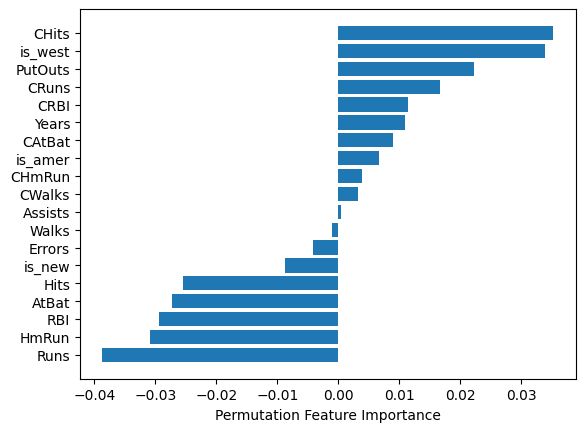

In [101]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
# Display feature importances
# Compute permutation feature importance
perm_importance = permutation_importance(xgb, X_test, y_test, n_repeats=30, random_state=45322)
feature_names = X.columns
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")


this graph indicates feature importance, particularly seeing how it effects the prediction if it were to be randomly shuffled. A neagtive value indicates low importance and a positive value indicates high importance. Given that information we can see runs have a very low importance while CHits has a very high importance. It is also worth noting that Chits and hits, as well as CRuns and Runs are nearly on opposite sides of the spectrum.